In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn import metrics
from scipy import stats
import math
from PIL import Image

In [9]:
df = pd.read_csv("data/kc_house_data_clean.csv")
df =df.drop(["Unnamed: 0"], axis = 1)

In [10]:
df = df.drop(["sqft_above", "sqft_living15", "sqft_lot15", "lat", "long" ], axis=1)

In [11]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,0.0,1955,0.0,66,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,0.0,1945,0.0,66,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,480.0,1967,0.0,66,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,0.0,1961,0.0,66,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,0.0,1931,0.0,66,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20661,1260000.0,3,2.50,3110,9930,1.0,0,2,0,9,1470.0,1954,0.0,24,7190.0,68,2014,2,0
20662,1200000.0,4,3.00,2150,8119,2.0,0,4,0,9,0.0,1953,2004.0,24,7190.0,69,2015,1,1
20663,1450000.0,5,2.75,3090,19865,1.0,0,4,2,10,0.0,1953,0.0,24,7190.0,69,2014,3,0
20664,1350000.0,3,2.00,2070,9600,1.0,0,2,0,8,480.0,1946,0.0,24,7190.0,76,2014,2,0


In [12]:
initial_corr = df.corr().sort_values(by="price", ascending=False)

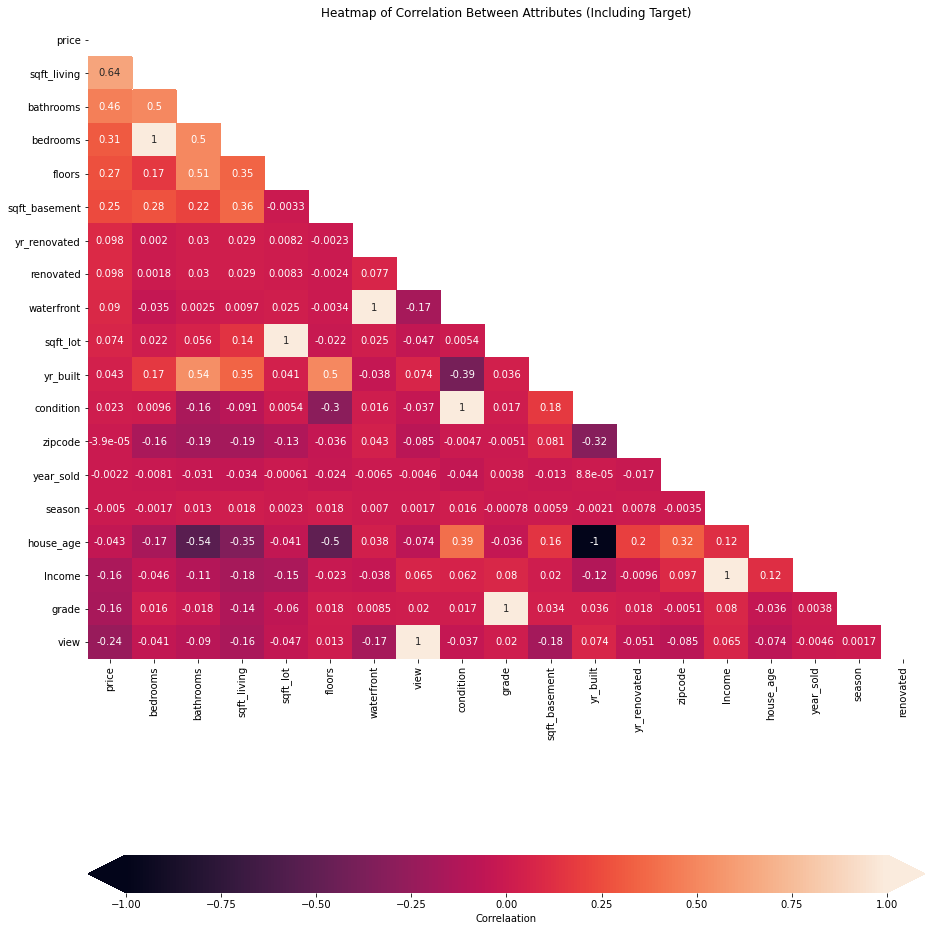

In [13]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(data = initial_corr, mask = np.triu(np.ones_like(initial_corr, dtype=bool)), ax = ax, annot = True, cbar_kws = {"label": "Correlaation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

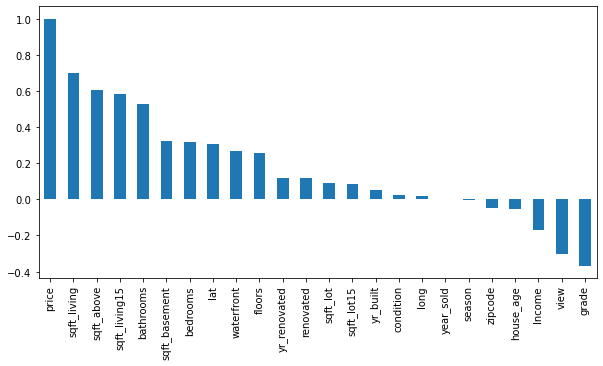

In [6]:
initial_corr['price'].sort_values(ascending = False).plot.bar(figsize=(10,5))
plt.show()

In [7]:
corr = df.corr()
abs(corr > .7)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
price,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
